# Basic ODE Solver

### Imports

In [30]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver

### Model Instantiation

Model must include rates, species, and reactions

In [31]:
import gillespy2
class VilarOscillator(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="VilarOscillator")
            
            #parameters
            alpha_a = gillespy2.Parameter(name='alpha_a', expression= 50.0)
            alpha_a_prime = gillespy2.Parameter(name='alpha_a_prime', expression= 500.0)
            alpha_r = gillespy2.Parameter(name='alpha_r', expression = 0.01)
            alpha_r_prime = gillespy2.Parameter(name='alpha_r_prime', expression = 50.0)
            beta_a = gillespy2.Parameter(name='beta_a', expression= 50.0)
            beta_r = gillespy2.Parameter(name='beta_r', expression= 5.0)
            delta_ma = gillespy2.Parameter(name='delta_ma', expression = 10.0)
            delta_mr = gillespy2.Parameter(name='delta_mr', expression = 0.5)
            delta_a = gillespy2.Parameter(name='delta_a', expression= 1.0)
            delta_r = gillespy2.Parameter(name='delta_r', expression= 0.2)
            gamma_a = gillespy2.Parameter(name='gamma_a', expression= 1.0)
            gamma_r = gillespy2.Parameter(name='gamma_r', expression= 1.0)
            gamma_c = gillespy2.Parameter(name='gamma_c', expression= 2.0)
            Theta_a = gillespy2.Parameter(name='Theta_a', expression= 50.0)
            Theta_r = gillespy2.Parameter(name='Theta_r', expression= 100.0)
        
            self.add_parameter([alpha_a,alpha_a_prime,alpha_r, alpha_r_prime,beta_a,beta_r,delta_ma,delta_mr,
                               delta_a,delta_r,gamma_a,gamma_r,gamma_c,Theta_a,Theta_r])
            
            #Species
            Da = gillespy2.Species(name='Da', initial_value=1)
            Da_prime = gillespy2.Species(name='Da_prime', initial_value=0)
            Ma = gillespy2.Species(name='Ma', initial_value=0)
            Dr = gillespy2.Species(name='Dr', initial_value=1)
            Dr_prime = gillespy2.Species(name='Dr_prime', initial_value=0)
            Mr = gillespy2.Species(name='Mr',initial_value=0)
            C = gillespy2.Species(name='C',initial_value=10)
            A = gillespy2.Species(name='A',initial_value=10)
            R = gillespy2.Species(name='R',initial_value=10)
            
            self.add_species([Da,Da_prime,Ma,Dr,Dr_prime,Mr,C,A,R])
            
            #reactions
            s_Da = gillespy2.Reaction(name="s_Da",reactants={Da_prime:1}, products={Da:1},rate=Theta_a)
            s_Da_prime = gillespy2.Reaction(name="s_Da_prime",reactants={Da:1,A:1}, products={Da_prime:1},rate=gamma_a)
            s_Dr = gillespy2.Reaction(name="s_Dr",reactants={Dr_prime:1}, products={Dr:1},rate=Theta_r)
            s_Dr_prime = gillespy2.Reaction(name="s_Dr_prime",reactants={Dr:1,A:1}, products={Dr_prime:1},rate=gamma_r)
            s_Ma1 = gillespy2.Reaction(name="s_Ma1",reactants={Da_prime:1},products={Da_prime:1,Ma:1},rate=alpha_a_prime)
            s_Ma2 = gillespy2.Reaction(name="s_Ma2",reactants={Da:1},products={Da:1,Ma:1},rate=alpha_a)
            a_Ma = gillespy2.Reaction(name="a_Ma",reactants={Ma:1},products={},rate=delta_ma)
            s_A1 = gillespy2.Reaction(name="s_A1",reactants={Ma:1},products={A:1,Ma:1},rate=beta_a)
            s_A2 = gillespy2.Reaction(name="S_A2",reactants={Da_prime:1},products={Da_prime:1,A:1},rate=Theta_a)
            s_A3 = gillespy2.Reaction(name="S_A3",reactants={Dr_prime:1},products={Dr_prime:1,A:1},rate=Theta_a)
            a_A = gillespy2.Reaction(name="a_A",reactants={A:1},products={},rate=gamma_c)
            s_C = gillespy2.Reaction(name="s_C",reactants={A:1,R:1},products={C:1},rate=gamma_c)
            S_Mr1 = gillespy2.Reaction(name="S_Mr1",reactants={Dr_prime:1},products={Dr_prime:1,Mr:1},rate=alpha_r_prime)
            S_Mr2 = gillespy2.Reaction(name="S_Mr2",reactants={Dr:1},products={Dr:1,Mr:1},rate=alpha_r)
            a_Mr = gillespy2.Reaction(name="a_Mr",reactants={Mr:1},products={},rate=delta_mr)
            s_R1 = gillespy2.Reaction(name="s_R1",reactants={Mr:1},products={Mr:1,R:1},rate=beta_r)
            a_R = gillespy2.Reaction(name="a_R",reactants={R:1},products={},rate=delta_r)
            s_r2 = gillespy2.Reaction(name="s_r2",reactants={C:1},products={R:1},rate=delta_a)
            
 
            self.add_reaction([s_Da,s_Da_prime,s_Dr,s_Dr_prime,s_Ma1,s_Ma2,a_Ma,s_A1,s_A2,s_A3,a_A,s_C,
                              S_Mr1,S_Mr2,a_Mr,s_R1,a_R,s_r2])
    
            self.timespan(numpy.linspace(0,200,201))

In [32]:
model = VilarOscillator()

### Run Model and plot
Run the model by calling the run function on the model and select solver via 'solver' keyword argument.  if show_labels is True, results are returned as a list of dictionaries, where the list index is the trajectory run index, and dictionary keys are comprised of species names and 'time'.  If show_labels is False, results are returned as a numpy array with indices [trajectory][timestep][species_no]

In [33]:
%time results = model.run(solver=BasicODESolver(), show_labels=True)

CPU times: user 635 ms, sys: 6.9 ms, total: 641 ms
Wall time: 796 ms


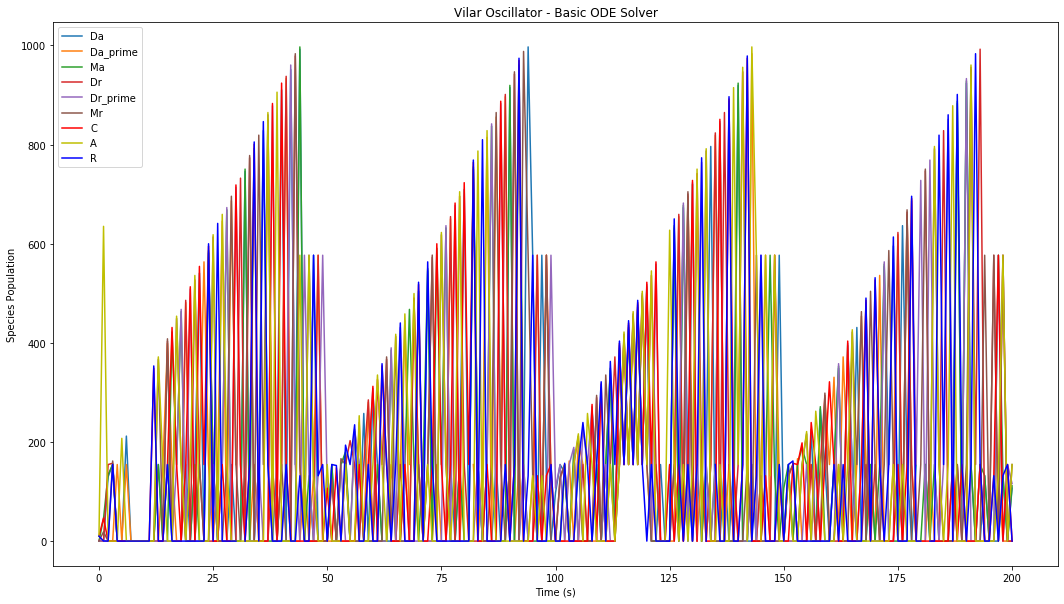

In [34]:
plt.figure(figsize=(18,10))
plt.title("Vilar Oscillator - Basic ODE Solver")
plt.xlabel("Time (s)")
plt.ylabel("Species Population")

plt.plot(results[0]['time'],results[0]['Da'], label='Da')
plt.plot(results[0]['time'],results[0]['Da_prime'], label='Da_prime')
plt.plot(results[0]['time'],results[0]['Ma'], label='Ma')
plt.plot(results[0]['time'],results[0]['Dr'], label='Dr')
plt.plot(results[0]['time'],results[0]['Dr_prime'], label='Dr_prime')
plt.plot(results[0]['time'],results[0]['Mr'], label='Mr')
plt.plot(results[0]['time'],results[0]['C'],'r', label='C')
plt.plot(results[0]['time'],results[0]['A'],'y', label='A')
plt.plot(results[0]['time'],results[0]['R'],'b', label='R')

plt.plot([0],[11])
plt.legend(loc='best')

### Plotly can be used to create interactive graphs.
 Plotly graphs can only be viewed in a Jupyter Notebook

In [35]:
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

output_data_frame = pd.DataFrame({'A':results[0]['A'],'C': results[0]['C'],'Da': results[0]['Da'],
                                  'Da_prime': results[0]['Da_prime'],'Dr':results[0]['Dr'],
                                  'Dr_prime':results[0]['Dr_prime'],'Ma':results[0]['Ma'],
                                  'Mr':results[0]['Mr'],'R':results[0]['R']})
output_data_frame.iplot()

<script type="text/javascript">
        window.PlotlyConfig = {MathJaxConfig: 'local'};
        if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
        if (typeof require !== 'undefined') {
        require.undef("plotly");
        requirejs.config({
            paths: {
                'plotly': ['https://cdn.plot.ly/plotly-latest.min']
            }
        });
        require(['plotly'], function(Plotly) {
            window._Plotly = Plotly;
        });
        }
        </script>

<script type="text/javascript">
        window.PlotlyConfig = {MathJaxConfig: 'local'};
        if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
        if (typeof require !== 'undefined') {
        require.undef("plotly");
        requirejs.config({
            paths: {
                'plotly': ['https://cdn.plot.ly/plotly-latest.min']
            }
        });
        require(['plotly'], function(Plotly) {
            window._Plotly = Plotly;
        });
        }
        </script>

<div>
        
        
            <div id="1d64b4ad-e221-4f41-8fbb-9d36bc6ef80d" class="plotly-graph-div" style="height:525px; width:100%;"></div>
            <script type="text/javascript">
                require(["plotly"], function(Plotly) {
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    window.PLOTLYENV.BASE_URL='https://plot.ly';
                    
                if (document.getElementById("1d64b4ad-e221-4f41-8fbb-9d36bc6ef80d")) {
                    Plotly.newPlot(
                        '1d64b4ad-e221-4f41-8fbb-9d36bc6ef80d',
                        [{"line": {"color": "rgba(255, 153, 51, 1.0)", "dash": "solid", "shape": "linear", "width": 1.3}, "mode": "lines", "name": "A", "text": "", "type": "scatter", "uid": "86bb478e-18fd-4fba-a1fe-f3a9e20702bc", "x": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200], "y": [10.0, 635.0589067831326, 0.0, 2.2749378155e-314, 6.9273952481437e-310, 207.30627441406313, 0.0, 6.92739524659193e-310, 6.92739524679826e-310, 6.92739524705636e-310, 6.9273952473943e-310, 6.92739524784133e-310, 2.246709272e-314, 371.6625976562514, 154.4556884765633, 9.1245819014e-313, 6.9273952465109e-310, 453.8409090909091, 154.4556884765633, 4.6683907405e-313, 154.4557288285622, 536.0190429687532, 1.485397053715e-312, 6.92739524652593e-310, 2.246048916e-314, 618.1972656250028, 6.92739524656624e-310, 659.2863636363636, 154.45568847656298, 6.92739524655557e-310, 2.5463949496e-313, 2.246709272e-314, 0.0, 8.91238232255e-313, 2.234625106e-314, 2.234625106e-314, 6.92739524658996e-310, 864.7314453125002, 6.92739524659747e-310, 905.8208007812532, 1.124657769266e-312, 2.4226681155e-314, 6.9273952466022e-310, 5e-324, 576.7998046875001, 0.0, 576.799804687502, 131.82495117187503, 6.92739524663304e-310, 0.0, 154.4557288285622, 2.2321276163e-314, 2.2297993734e-314, 2.2297993734e-314, 154.4557288285622, 4.45619116167e-313, 6.92739524666426e-310, 252.9609090909091, 1e-323, 2.388887294e-314, 154.4557288285622, 335.1389160156259, 154.4557288285622, 2.5463949499e-313, 154.45568847656253, 417.31713867187506, 6.92739524669707e-310, 458.40636363636366, 154.45568847656267, 499.4953613281266, 4.6683907409e-313, 6.92739524672197e-310, 154.4557288285622, 1.23075755884e-312, 6.92739524671407e-310, 622.7627272727273, 154.4556884765633, 4.66839074096e-313, 154.4557288285622, 704.9404296875032, 1.48539705376e-312, 6.92739524673225e-310, 2.369775218e-314, 787.1186523437528, 6.92739524677256e-310, 828.2081818181819, 154.45568847656298, 6.9273952467619e-310, 2.54639495005e-313, 2.246709272e-314, 0.0, 8.912382323e-313, 2.234625106e-314, 2.234625106e-314, 6.9273952467963e-310, 131.82495117187506, 6.9273952468038e-310, 131.8249511718758, 9.97338021852e-313, 2.4226681037e-314, 6.92739524680853e-310, 5e-324, 154.45568847656253, 0.0, 154.455688476563, 216.43725585937503, 6.92739524683936e-310, 257.5263636363636, 154.4557288285622, 2.2321276163e-314, 2.2297993734e-314, 2.2297993734e-314, 154.4557288285622, 4.6683907412e-313, 154.4557288285622, 421.88272727272727, 154.4557288285622, 462.9718181818182, 154.4557288285622, 504.0609090909091, 154.4557288285622, 545.1500000000001, 6.9